In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
##DV EXAM
##ANIKET NANDY
##015015

In [16]:
df = pd.read_csv("covid_india.csv") 

In [17]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [18]:
df["Date"] = pd.to_datetime(df["Date"])

In [19]:
df["month"] = df["Date"].dt.month 
df["day"] = df["Date"].dt.day 
df["day_name"] = df["Date"].dt.day_name

In [20]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,month,day,day_name
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1,30,<bound method PandasDelegate._add_delegate_acc...
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1,31,<bound method PandasDelegate._add_delegate_acc...
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2,1,2,<bound method PandasDelegate._add_delegate_acc...
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2,2,<bound method PandasDelegate._add_delegate_acc...
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3,3,2,<bound method PandasDelegate._add_delegate_acc...


In [21]:
m = df.groupby(["month"])[["Confirmed"]].agg("sum") 
m

,Confirmed
month,
1,30159470
2,30485672
3,30818344
4,31504870
5,33795041
6,39457789
7,55350453
8,89165495
9,132000768


In [22]:
m = m.reset_index() 
m.head() 

,month,Confirmed
0,1,30159470
1,2,30485672
2,3,30818344
3,4,31504870
4,5,33795041


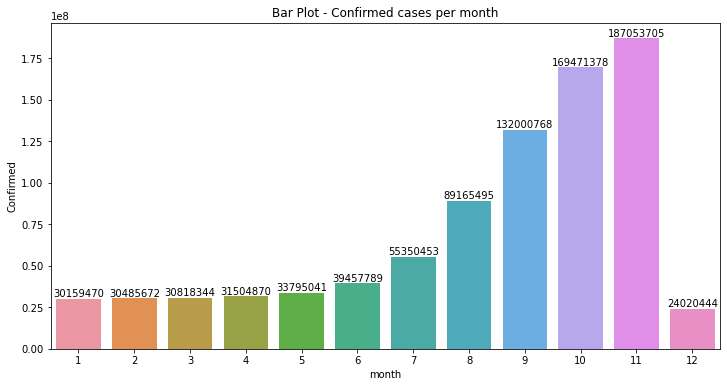

In [23]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x="month",y="Confirmed",data=m)
ax.set_title("Bar Plot - Confirmed cases per month")

#Annotation
for p, v in zip(ax.patches, m['Confirmed']): 
    height = p.get_height() 
    ax.text(p.get_x() + p.get_width() / 2, height + 5, v, 
           ha='center', va='bottom') 
plt.show()